## Keras - Classifying IRIS dataset with Logistic Regression

From Wikipedia, the free encyclopedia (https://en.wikipedia.org/wiki/Iris_flower_data_set)

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In this Jupyter notebook, logistic regression model is used to classify Iris flowers on the four features - petal length, petal width, sepal length and sepal width). The library Pandas is used to read the dataset as a CSV file.

### Reading the IRIS dataset as a CSV file

In [104]:
import pandas as pd #Use Pandas to read the CSV file
from keras.utils import np_utils

df = pd.read_csv('IRIS.csv')
dataset = df.values
#Reads first 4 columns as features (petal length, petal width, sepal length and sepal width)
X = dataset[:,0:4].astype('float32') #convert features to float32 also
y = dataset[:,4] #Reads the last column as labels (0 - Setosa, 1 - Versicolour, 2 - Virginica)
NB_CLASSES = 3 #No of classes
y_one_hot = np_utils.to_categorical(y, NB_CLASSES) #Labels converted to one-hot vectors
print "Size(X) = ", X.shape
print "Size(y_one_hot) = ", y_one_hot.shape 

Size(X) =  (150, 4)
Size(y_one_hot) =  (150, 3)


### Splitting the dataset into training and testing

In [105]:
from sklearn.model_selection import train_test_split
#80% for training and 20% for testing
X_train, X_test, y_train_one_hot, y_test_one_hot = train_test_split(X, y_one_hot, test_size=0.2)
print "Size(X_train) = ", X_train.shape
print "Size(y_train_one_hot) = ", y_train_one_hot.shape
print "Size(X_test) = ", X_test.shape
print "Size(y_test_one_hot) = ", y_test_one_hot.shape

Size(X_train) =  (120, 4)
Size(y_train_one_hot) =  (120, 3)
Size(X_test) =  (30, 4)
Size(y_test_one_hot) =  (30, 3)


### Building the logisitic model

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Activation
NB_CLASSES = 3
INPUT_DIM  = 4

model = Sequential()
model.add(Dense(NB_CLASSES, activation='softmax', input_shape=(INPUT_DIM,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [107]:
from keras.optimizers import SGD

OPTIMIZER = SGD(lr=0.1)
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting the model

In [108]:
BATCH_SIZE = 8
EPOCHES = 50
VERBOSE = 1

model_history = model.fit(x=X_train, y=y_train_one_hot, batch_size=BATCH_SIZE, 
                          epochs=EPOCHES, verbose=VERBOSE)

Epoch 1/50
120/120 [==============================] - 0s - loss: 1.7363 - acc: 0.4417         
Epoch 2/50
120/120 [==============================] - 0s - loss: 0.8274 - acc: 0.6667     
Epoch 3/50
120/120 [==============================] - 0s - loss: 1.4059 - acc: 0.5833     
Epoch 4/50
120/120 [==============================] - 0s - loss: 0.9177 - acc: 0.7000     
Epoch 5/50
120/120 [==============================] - 0s - loss: 0.7768 - acc: 0.6583     
Epoch 6/50
120/120 [==============================] - 0s - loss: 0.7282 - acc: 0.7083     
Epoch 7/50
120/120 [==============================] - 0s - loss: 1.2313 - acc: 0.6250     
Epoch 8/50
120/120 [==============================] - 0s - loss: 0.4122 - acc: 0.8333     
Epoch 9/50
120/120 [==============================] - 0s - loss: 0.7366 - acc: 0.7167     
Epoch 10/50
120/120 [==============================] - 0s - loss: 0.8081 - acc: 0.6583     
Epoch 11/50
120/120 [==============================] - 0s - loss: 0.7152 - acc: 0.725

### Evaluating the model

In [109]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

('Test score:', 0.10371842235326767)
('Test accuracy:', 0.96666663885116577)


### Predicting the class

In [110]:
y_probability = model.predict(X_test)
y_classes = y_probability.argmax(axis=-1)
print "True class = ", y_test_one_hot[10], "Predicted class = ", y_classes[10]

True class =  [ 0.  1.  0.] Predicted class =  2


### Plotting the model performances

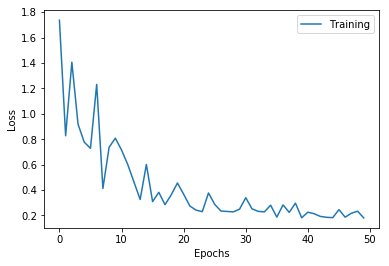

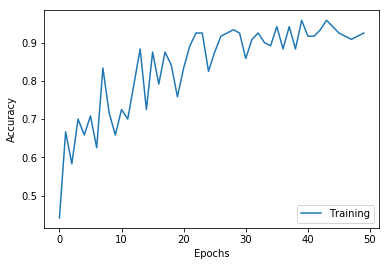

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.legend(['Training'], loc='lower right')
    plt.show()

plot_history(model_history)